# Project to show knowledge in Vector Databases

Done by: Sebastián Sarasti

Goal: Create a recommendation system based on movies description and filters

In [1]:
import numpy as np
import pandas as pd

Load data

In [2]:
df = pd.read_csv("../data/books.csv")

# EDA

See what we have in the DF

In [3]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


See properties of the DF

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [5]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


Verify null values

In [6]:
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

It is going to fill the null values in the columns subtitle, authors, thumbnail, and ratings_count

In [7]:
df[['subtitle', 'authors', 'thumbnail', 'ratings_count']] = df[['subtitle', 'authors', 'thumbnail', 'ratings_count']].fillna("NA")

In [8]:
df.isnull().sum()

isbn13              0
isbn10              0
title               0
subtitle            0
authors             0
categories         99
thumbnail           0
description       262
published_year      6
average_rating     43
num_pages          43
ratings_count       0
dtype: int64

It is going be deleted the rest of rows with null values, because it doesn't have sense to recommend books without a description, published year, and the rest of features

In [9]:
df = df.dropna()	

It is verified the null values

In [10]:
df.isnull().sum()

isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64

# Feature Engineering

It is going to be cleaned the text, and measure the length of the descriptions. 

1. Every description is going to be lowercased

In [11]:
df["description"] = df["description"].apply(lambda x: x.lower())

2. It is going be to created a regex function to clean the text

In [12]:
import re

In [13]:
def clean_text(text : str) -> str:
    """
    This function cleans a given text by removing new lines, dots, multiple spaces and trailing spaces.

    Args:
        text (str): text to clean

    Returns:
        text (str): cleaned text
    """
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\.{3,}', '', text)
    text = re.sub(r'([^\w\s])\1{2,}', r'\1', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"#\s*P\s*T\s*#", "", text)
    text = re.sub(r"\s*#", "", text)
    text = text.strip()
    return text

In [14]:
df["description"] = df["description"].apply(lambda x: clean_text(x))

In [15]:
df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NA,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,a novel that readers and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,a new 'christie for christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NA,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,volume two of stephen donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NA,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"a memorable, mesmerizing heroine jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NA,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NA,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,this book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NA,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"wisdom to create a life of passion, purpose, a...",2003.0,3.82,198.0,1568.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,this collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NA,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,since the three volume edition ofhegel's philo...,1981.0,0.00,210.0,0.0


3. It is going to be created a column to measure the number of tokens in the text

In [16]:
df["l_tokens"] = df["description"].apply(lambda x: len(x.split()))

In [17]:
import seaborn as sns

<Axes: xlabel='l_tokens', ylabel='Count'>

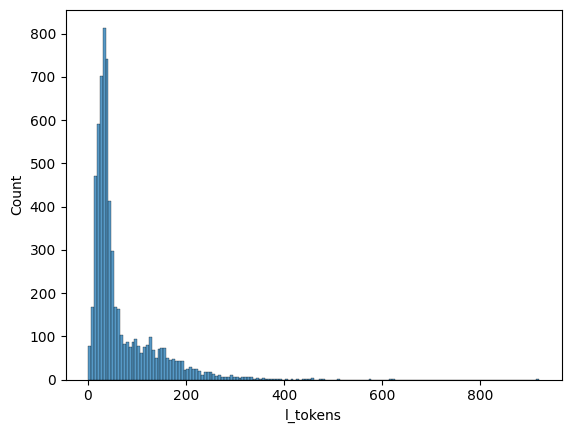

In [18]:
sns.histplot(df["l_tokens"])

In [19]:
np.mean(df["l_tokens"])

66.28313253012048

In [20]:
np.std(df["l_tokens"])

66.14840181300396

99% of the data is going to be located between mean +- 3*std

In [21]:
np.mean(df["l_tokens"]) + 3*np.std(df["l_tokens"])

264.7283379691324

Thus, this shows that most of the descriptions are going to have until 265 tokens aproximadetly. It has to be used an embedding able to deal with window size context.

# Embeddings Generation

1. It is going to be created a document object from langchain to save the text and the useful metadata.

In [24]:
from langchain_community.document_loaders import DataFrameLoader

In [26]:
df = df.drop(["thumbnail", "ratings_count", "l_tokens"], axis=1)

In [27]:
loader = DataFrameLoader(df, page_content_column="description")

In [30]:
docs = loader.load()

2. It is going to be created some embeddings from the huggingface inference API. 

The model selected is the maidalun1020/bce-embedding-base_v1. This model uses until 750 tokens, more than this is going to be truncated.

In [37]:
import requests
from dotenv import load_dotenv
import os
from langchain.embeddings import HuggingFaceInferenceAPIEmbeddings
import pinecone

C:\Users\sebit\AppData\Roaming\Python\Python39\site-packages\pinecone\index.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [39]:
load_dotenv("../.env")

True

In [40]:
embedding = HuggingFaceInferenceAPIEmbeddings(api_key=os.getenv('HUGGING_FACE_API'), model_name="maidalun1020/bce-embedding-base_v1")

In [41]:
pinecone.init(api_key=os.getenv("PINECONE_API_KEY"), environment=os.getenv("PINECONE_ENV"))

In [ ]:
vector_store = Pinecone.from_existing_index(
            index_name=index_name, embedding=embedding, namespace=namespace)